In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import time
import sys
sys.path.insert(0, '../../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *
%matplotlib inline

# Generate synethic data

In [2]:
N = 10 # number of teams
T = 10 # number of seasons/rounds/years
tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
[alpha,r] = [1,1]
##### get beta here #####
random.seed(0)
np.random.seed(0)
beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,0.1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

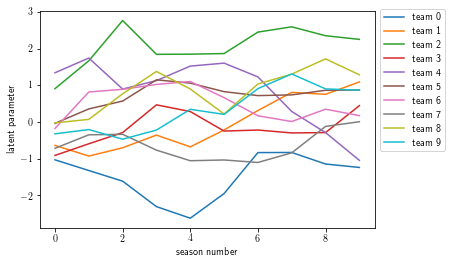

In [4]:
latent = beta_gp
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

In [5]:
data = game_matrix_list # shape: T*N*N

In [6]:
# true beta
beta_true = beta_gp + 0

In [7]:
beta_true.shape

(10, 10)

## Kernel method

## $h = T^{-3/4}$

In [8]:
T**(-1/4)

0.5623413251903491

In [9]:
T, N = data.shape[0:2]
ks_data = kernel_smooth(data,T**(-3/4))

In [10]:
ks_data[1,:,:]

array([[0.00000000e+00, 2.22395980e-02, 0.00000000e+00, 9.41384828e-04,
        1.07315925e-03, 1.20526728e-04, 0.00000000e+00, 2.44613224e-01,
        5.35938616e-03, 2.80197187e-01],
       [9.77760402e-01, 0.00000000e+00, 6.30077099e-03, 1.20526728e-04,
        3.87686167e-01, 1.70540153e-01, 2.44744998e-01, 2.66984596e-01,
        3.02327506e-01, 3.86624255e-01],
       [1.00000000e+00, 9.93699229e-01, 0.00000000e+00, 8.51699445e-01,
        6.13386993e-01, 7.39447949e-01, 6.13386993e-01, 9.99879473e-01,
        8.51578918e-01, 7.61687547e-01],
       [9.99058615e-01, 9.99879473e-01, 1.48300555e-01, 0.00000000e+00,
        2.80208435e-01, 5.17458976e-01, 2.43683087e-01, 5.44844659e-01,
        2.22395980e-02, 4.54832761e-01],
       [9.98926841e-01, 6.12313833e-01, 3.86613007e-01, 7.19791565e-01,
        0.00000000e+00, 6.87999128e-01, 6.72169581e-01, 9.93567455e-01,
        9.76698490e-01, 9.94520087e-01],
       [9.99879473e-01, 8.29459847e-01, 2.60552051e-01, 4.82541024e-01,
   

In [11]:
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

initial objective value: 311.916231
1-th GD, objective value: 256.441686
2-th GD, objective value: 239.590232
3-th GD, objective value: 238.284565
4-th GD, objective value: 237.930343
5-th GD, objective value: 237.803956
6-th GD, objective value: 237.751576
7-th GD, objective value: 237.727692
8-th GD, objective value: 237.716079
9-th GD, objective value: 237.710174
10-th GD, objective value: 237.707074
11-th GD, objective value: 237.705407
12-th GD, objective value: 237.704496
13-th GD, objective value: 237.703990
14-th GD, objective value: 237.703706
15-th GD, objective value: 237.703546
16-th GD, objective value: 237.703455
17-th GD, objective value: 237.703403
18-th GD, objective value: 237.703373
19-th GD, objective value: 237.703355
20-th GD, objective value: 237.703345
21-th GD, objective value: 237.703339
22-th GD, objective value: 237.703336
23-th GD, objective value: 237.703334
24-th GD, objective value: 237.703333
25-th GD, objective value: 237.703332
26-th GD, objective val

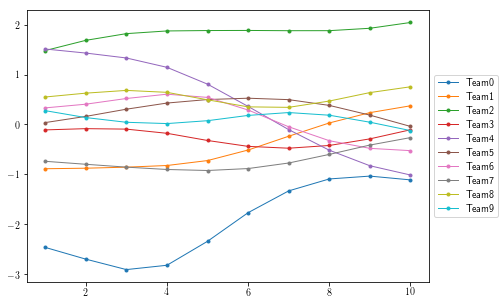

In [12]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# f.savefig("l2_sq_solution.pdf", bbox_inches='tight')

## LOOCV

In [13]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
h_list = np.linspace(0.3, 0.01, 5)
# h_cv, nll_cv, beta_cv, prob_cv = cv_utils.loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
loo_nll_DBT, loo_prob_DBT = max(nll_cv), prob_cv[np.argmax(nll_cv)]

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [14]:
h_cv

0.3

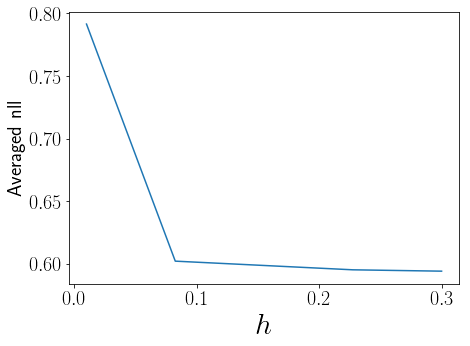

In [15]:
f = plt.figure(1, figsize = (7,5))
size_ylabel = 20
size_xlabel = 30
size_tick = 20

nll_cv = nll_cv
plt.plot(h_list[::-1], nll_cv)
plt.xlabel(r'$h$',fontsize = size_xlabel); plt.ylabel(r"Averaged nll",fontsize = size_ylabel)
plt.tick_params(axis='both', which='major', labelsize=size_tick)

# f.savefig("cv_curve.pdf", bbox_inches='tight')

In [16]:
start_time = time.time()

random.seed(0)
np.random.seed(0)
h = 0.1
nll_DBT, beta_DBT, prob_DBT = loo_DBT(data, h, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [17]:
# winrate
random.seed(0)
np.random.seed(0)
winrate = get_winrate(data)
loo_nll_wr, loo_prob_wr = loo_winrate(data)

In [18]:
loo_prob_wr

0.42875

In [19]:
# vanilla BT
start_time = time.time()

random.seed(0)
np.random.seed(0)
objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data,verbose = True)
loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = 200)

print("--- %s seconds ---" % (time.time() - start_time))

initial objective value: 311.916231
1-th GD, objective value: 222.980522
2-th GD, objective value: 190.103509
3-th GD, objective value: 184.158332
4-th GD, objective value: 181.426399
5-th GD, objective value: 179.832086
6-th GD, objective value: 178.774498
7-th GD, objective value: 178.014102
8-th GD, objective value: 177.436500
9-th GD, objective value: 176.980029
10-th GD, objective value: 176.608398
11-th GD, objective value: 176.298777
12-th GD, objective value: 176.036031
13-th GD, objective value: 175.809699
14-th GD, objective value: 175.612297
15-th GD, objective value: 175.438315
16-th GD, objective value: 175.283597
17-th GD, objective value: 175.144944
18-th GD, objective value: 175.019847
19-th GD, objective value: 174.906309
20-th GD, objective value: 174.802719
21-th GD, objective value: 174.707757
22-th GD, objective value: 174.620338
23-th GD, objective value: 174.539551
24-th GD, objective value: 174.464635
25-th GD, objective value: 174.394940
26-th GD, objective val

In [20]:
loo_nll_vBT

0.791544223780145

In [21]:
loo_prob_vBT

0.34942593328374744

In [22]:
rank_dif_estimator = [0] * 3
beta_all = [winrate,beta_vanilla_bt,beta_cv]
for i in range(len(rank_dif_estimator)):
    betai = beta_all[i]
    rank_dif_estimator[i] = np.mean(av_dif_rank(beta_true,betai))
rank_dif_estimator

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

In [23]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.43 &     0.00 &                     1.50 &     winrate \\
     0.35 &     0.79 &                     1.52 &  vanilla BT \\
     0.35 &     0.79 &                     0.74 &         DBT \\
\bottomrule
\end{tabular}



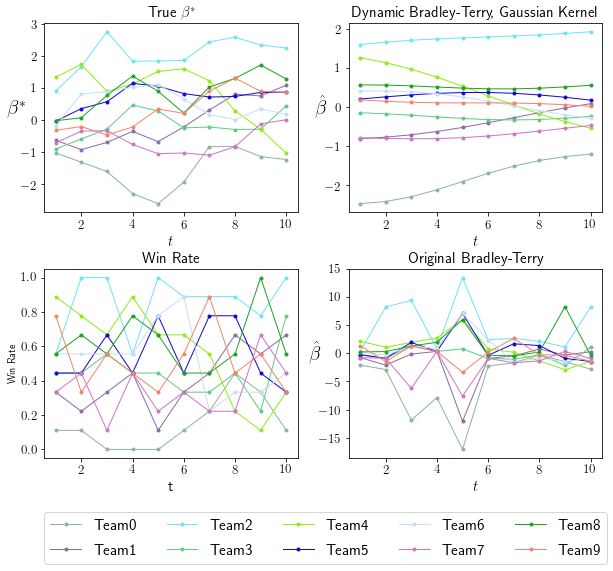

In [24]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel("t",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
# f.savefig("compare.pdf", bbox_inches='tight')

## repeated experiment

In [25]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
B = 20
loo_ks = 200
loo = 200
h_cv_list = []
rank_diff_DBT_list, loo_nll_DBT_list, loo_prob_DBT_list = [], [], []
rank_diff_wr_list, loo_nll_wr_list, loo_prob_wr_list = [], [], []
rank_diff_vBT_list, loo_nll_vBT_list, loo_prob_vBT_list = [], [], []

for b in range(B):
    N = 10 # number of teams
    T = 10 # number of seasons/rounds/years
    tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

    [alpha,r] = [1,1]
    ##### get beta here #####
    beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,1], 
                                    cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
    game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

    data = game_matrix_list # shape: T*N*N

    # true beta
    beta_true = beta_gp + 0

    # ks cv
    h_list = np.linspace(0.5, 0.05, 10)
    h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = loo_ks, verbose = False,
                                              return_prob = True, out = "notebook")
    h_cv_list.append(h_cv)
    loo_nll_DBT_list.append(max(nll_cv)) 
    loo_prob_DBT_list.append(prob_cv[np.argmax(nll_cv)])
    rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_true,beta_cv)))
    
    winrate = get_winrate(data)
    loo_nll_wr, loo_prob_wr = loo_winrate(data,num_loo = loo)
    loo_nll_wr_list.append(loo_nll_wr)
    loo_prob_wr_list.append(loo_prob_wr)
    rank_diff_wr_list.append(np.mean(av_dif_rank(beta_true,winrate)))
    
    objective_vanilla_bt, beta_vBT = gd_bt(data = data)
    loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = loo)
    loo_nll_vBT_list.append(loo_nll_vBT)
    loo_prob_vBT_list.append(loo_prob_vBT)
    rank_diff_vBT_list.append(np.mean(av_dif_rank(beta_true,beta_vBT)))
    
    print(str(b) + '-th repeat finished.')
    print("--- %s seconds ---" % (time.time() - start_time))
    
    
rank_dif_estimator = [np.mean(rank_diff_wr_list),
                     np.mean(rank_diff_vBT_list),
                     np.mean(rank_diff_DBT_list)]
loo_prob_wr = np.mean(loo_prob_wr_list)
loo_prob_vBT = np.mean(loo_prob_vBT_list)
loo_prob_DBT = np.mean(loo_prob_DBT_list)


loo_nll_wr = np.mean(loo_nll_wr_list)
loo_nll_vBT = np.mean(loo_nll_vBT_list)
loo_nll_DBT = np.mean(loo_nll_DBT_list)

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})


print("--- %s seconds ---" % (time.time() - start_time))

0-th repeat finished.
--- 3923.4671635627747 seconds ---
1-th repeat finished.
--- 4761.1521553993225 seconds ---
2-th repeat finished.
--- 5566.437750339508 seconds ---
3-th repeat finished.
--- 5755.242266654968 seconds ---
4-th repeat finished.
--- 6563.886559247971 seconds ---
5-th repeat finished.
--- 8869.012331485748 seconds ---
6-th repeat finished.
--- 9892.452532052994 seconds ---
7-th repeat finished.
--- 10721.008635759354 seconds ---
8-th repeat finished.
--- 11073.290153741837 seconds ---
9-th repeat finished.
--- 11945.422173023224 seconds ---
10-th repeat finished.
--- 12187.788078069687 seconds ---
11-th repeat finished.
--- 13228.261977434158 seconds ---
12-th repeat finished.
--- 14105.692553520203 seconds ---
13-th repeat finished.
--- 16017.474299669266 seconds ---
14-th repeat finished.
--- 16269.424015045166 seconds ---
15-th repeat finished.
--- 17178.537375450134 seconds ---
16-th repeat finished.
--- 17433.0626680851 seconds ---
17-th repeat finished.
--- 1916

In [26]:
rank_dif_estimator = [np.mean(rank_diff_wr_list),
                     np.mean(rank_diff_vBT_list),
                     np.mean(rank_diff_DBT_list)]
loo_prob_wr = np.mean(loo_prob_wr_list)
loo_prob_vBT = np.mean(loo_prob_vBT_list)
loo_prob_DBT = np.mean(loo_prob_DBT_list)


loo_nll_wr = np.mean(loo_nll_wr_list)
loo_nll_vBT = np.mean(loo_nll_vBT_list)
loo_nll_DBT = np.mean(loo_nll_DBT_list)

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})


In [27]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.41 &     0.00 &                     1.23 &     winrate \\
     0.32 &     0.92 &                     1.26 &  vanilla BT \\
     0.31 &     0.59 &                     0.84 &         DBT \\
\bottomrule
\end{tabular}



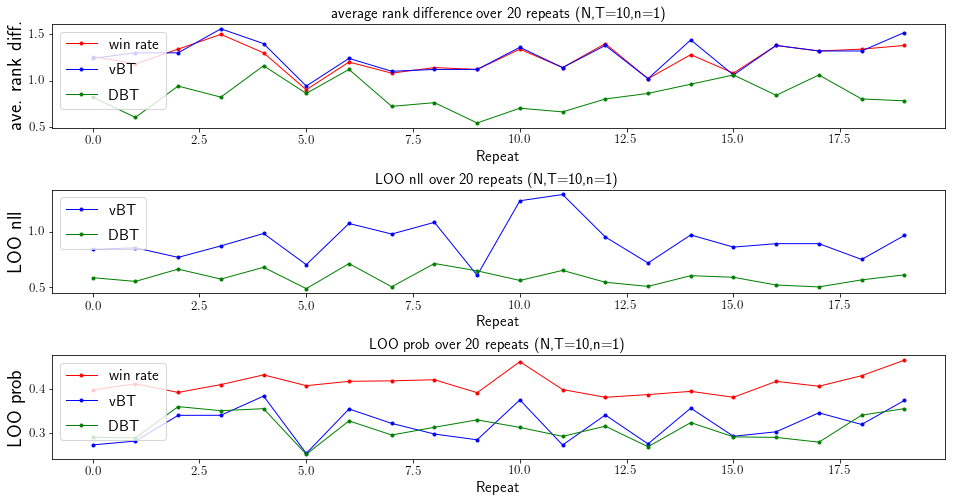

In [28]:
f = plt.figure(1, figsize = (16,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_list = ['red','blue','green']
x_range = [i for i in range(B)]

ax = plt.subplot(311)
ax.plot(x_range,rank_diff_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,rank_diff_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,rank_diff_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"average rank difference over 20 repeats (N,T=10,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"ave. rank diff.",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)
    
ax = plt.subplot(312)
ax.plot(x_range,loo_nll_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_nll_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO nll over 20 repeats (N,T=10,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO nll",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)

ax = plt.subplot(313)
ax.plot(x_range,loo_prob_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,loo_prob_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_prob_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO prob over 20 repeats (N,T=10,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO prob",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)


plt.subplots_adjust(hspace = 0.6)
plt.show()
f.savefig("perform_NT10_n1_BT.pdf", bbox_inches='tight')

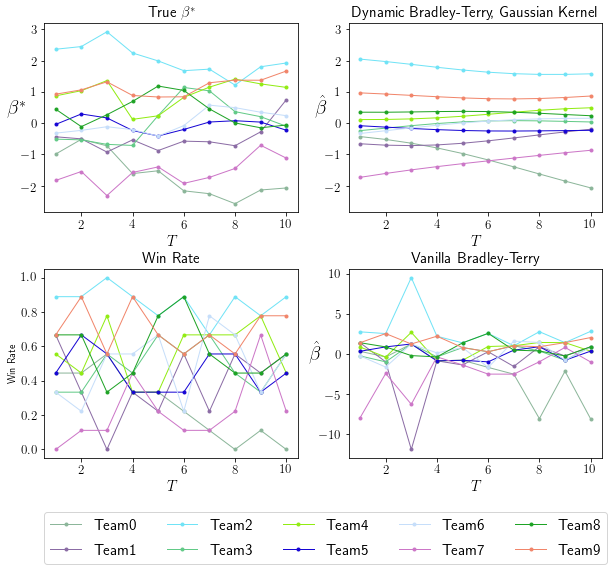

In [29]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
# f.savefig("compare.pdf", bbox_inches='tight')

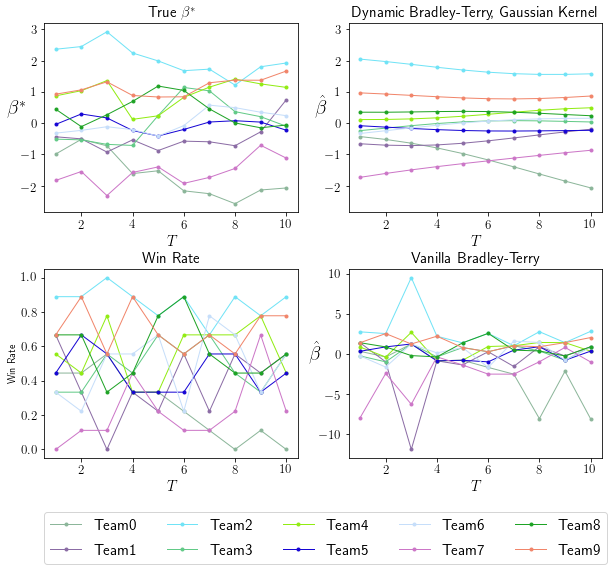

In [30]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
# f.savefig("compare.pdf", bbox_inches='tight')